In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mushroom-classification/mushrooms.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [3]:
df=pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [4]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


* **Feature Classification**

* **class**:
edible=e, poisonous=p

* **cap-shape**:
bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

* **cap-surface**:
fibrous=f,grooves=g,scaly=y,smooth=s

* **cap-color**:
brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

* **bruises**:
bruises=t,no=f

* **odor**:
almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

* **gill-attachment**:
attached=a, descending=d, free=f, notched=n

* **gill-spacing**:
close=c,crowded=w,distant=d

* **gill-size**:
broad=b,narrow=n

* **gill-color**:
black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y



In [17]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [18]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

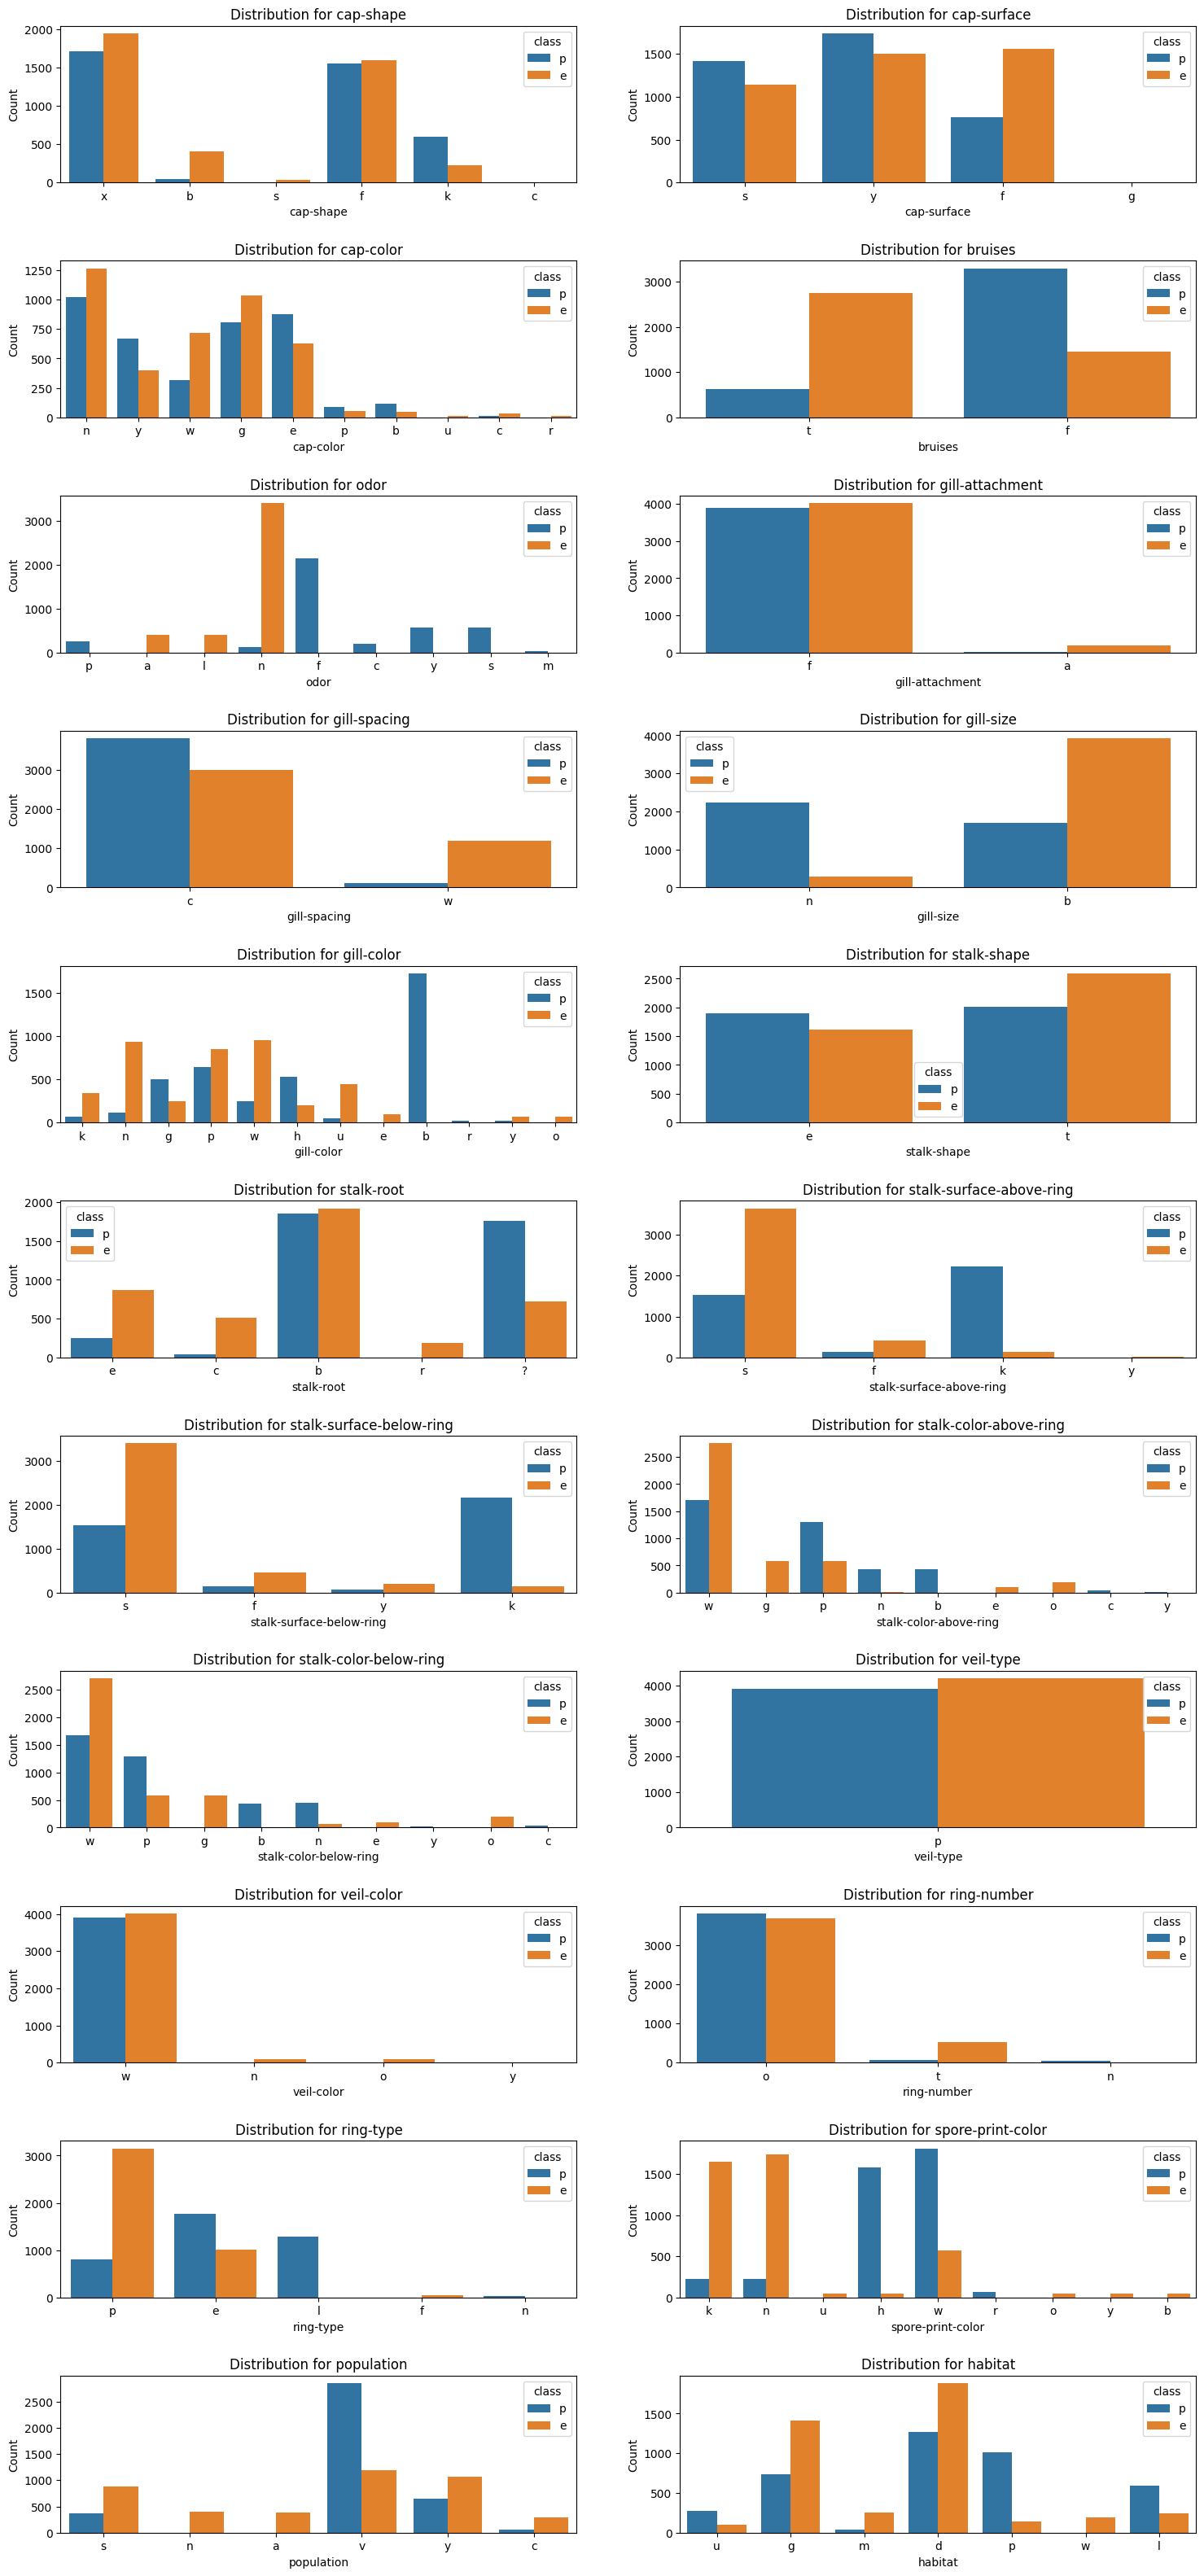

In [19]:

# Creating subplots
fig, axes = plt.subplots(11, 2, figsize=(18, 40))
plt.subplots_adjust(hspace=0.5)  # vertical spacing between subplots

# columns for countplots
columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
           'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
           'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
           'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
           'spore-print-color', 'population', 'habitat']

# Looping the columns to create countplots
for i, column in enumerate(columns):
    row = i // 2
    col = i % 2
    sns.countplot(x=column, hue='class', data=df, ax=axes[row, col])
    axes[row, col].set_title(f'Distribution for {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Count')

# Show the subplots
plt.show()


In [20]:
df1=df.copy()

df1['class'] = df1['class'].map({'e': 0, 'p': 1})

In [21]:


categorical_columns = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment',
                       'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root',
                       'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring',
                       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type',
                       'spore-print-color', 'population', 'habitat']

lbl_encoder = LabelEncoder()


for column in categorical_columns:
    df1[column] = lbl_encoder.fit_transform(df1[column])




In [22]:
df1

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [23]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('class', axis=1),df1['class'] , test_size=0.2, random_state=42)

Accuracy: 0.9464615384615385


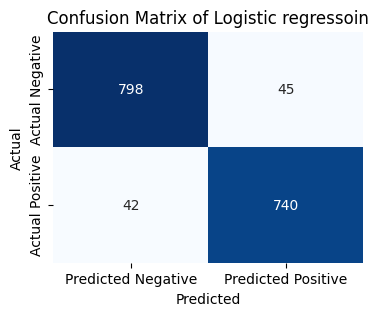

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

lgr = LogisticRegression(solver='liblinear')
lgr.fit(X_train, y_train)
y_pred = lgr.predict(X_test)
accuracy = lgr.score(X_test, y_test)

print("Accuracy:", accuracy)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic regressoin')
plt.show()


Accuracy: 1.0


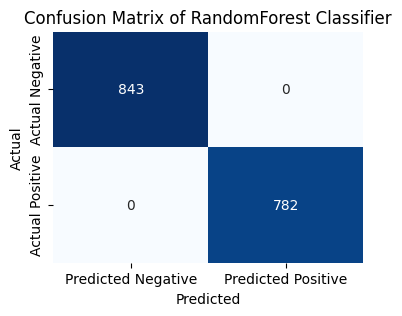

In [25]:
rndmforest=RandomForestClassifier()

rndmforest.fit(X_train,y_train)
y_pred = rndmforest.predict(X_test)
accuracy = rndmforest.score(X_test, y_test)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForest Classifier')
plt.show()


Accuracy: 1.0


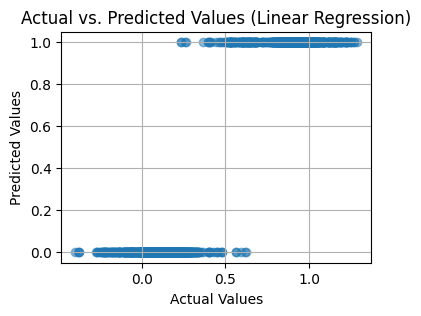

In [27]:
from sklearn.metrics import mean_squared_error
lnrRegression=LinearRegression()
lnrRegression.fit(X_train,y_train)
y_test=lnrRegression.predict(X_test)
accuracy = lnrRegression.score(X_test, y_test)
print("Accuracy:", accuracy)


plt.figure(figsize=(4, 3))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Linear Regression)")
plt.grid(True)
plt.show()
